# Use smooth functions

Use smooth and differentiable functions instead of discontinuities for automatic differentiation (AD) and differential equation solvers.

## Heaviside step function

A [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) (0 when x < a, 1 when x > a) could be approximated with a steep [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

In [1]:
using Plots

The function output switches from zero to one around `x=0`.
`k` is the steepness of the function.

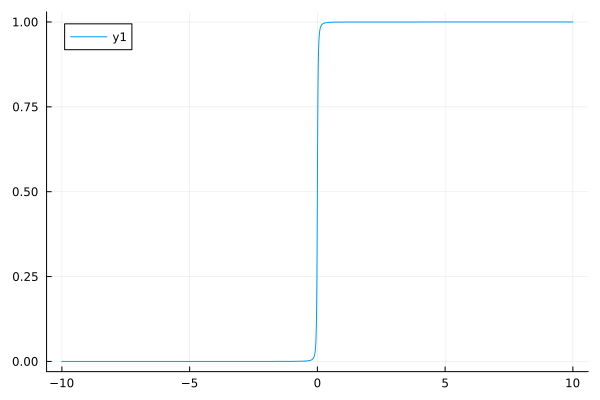

In [2]:
function smoothheaviside(x, k=1000)
    return 1 / (1 + exp(-k * x))
end

plot(smoothheaviside, -1, 1)

### Smooth step function with `sqrt`
function smoothstep_sqrt(x; c=(1//2)^10)
    0.5 * (x / (sqrt(x^2 + c)) + 1)
end

plot(smoothstep_sqrt, -10, 10)

## Smooth single pulse
A single pulse could be built with a product of two step functions.

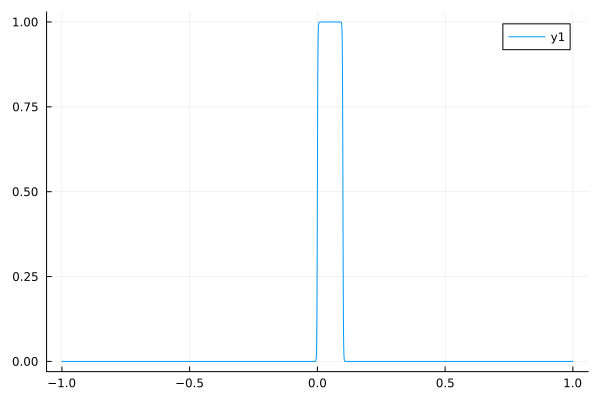

In [3]:
function singlepulse(x, t0=0, t1=0.1, k=1000)
    smoothheaviside(x - t0, k) * smoothheaviside(t1 - x, k)
end

plot(singlepulse, -1, 1)

## Smooth absolute value
Inspired by: https://discourse.julialang.org/t/smooth-approximation-to-max-0-x/109383/13

Approximate `abs(x)`

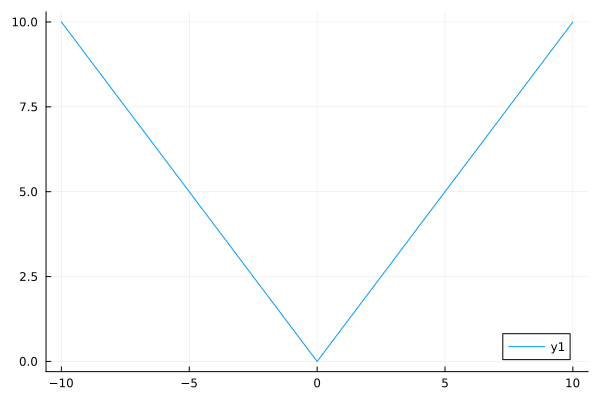

In [4]:
function smoothabs(x; c=(1//2)^10)
    hypot(x, c) - c
end

plot(smoothabs, -10, 10)

# Smooth max function

Approximate `max(0, x)`

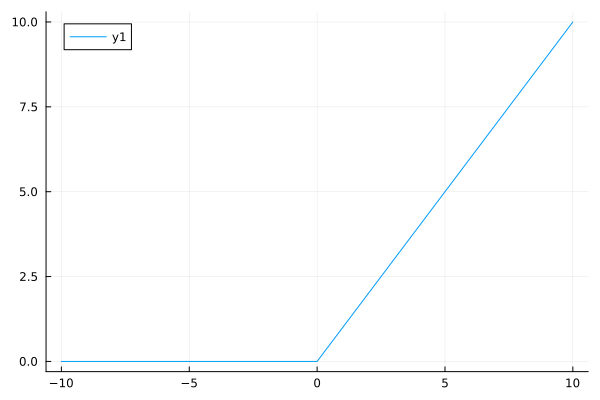

In [5]:
function smoothmax(x; c=(1//2)^10)
    0.5 * (x + smoothabs(x; c))
end

plot(smoothmax, -10, 10)

## Smooth minimal function
Approximate `min(0, x)`

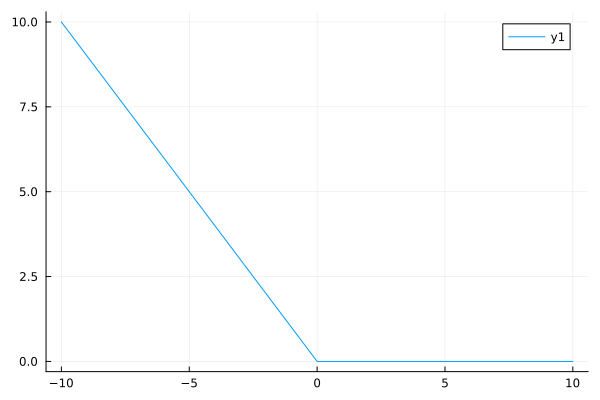

In [6]:
function smoothmin(x; c=(1//2)^10)
    0.5 * (smoothabs(x;c) - x)
end

plot(smoothmin, -10, 10)

## Periodic pulses
From: https://www.noamross.net/2015/11/12/a-smooth-differentiable-pulse-function/

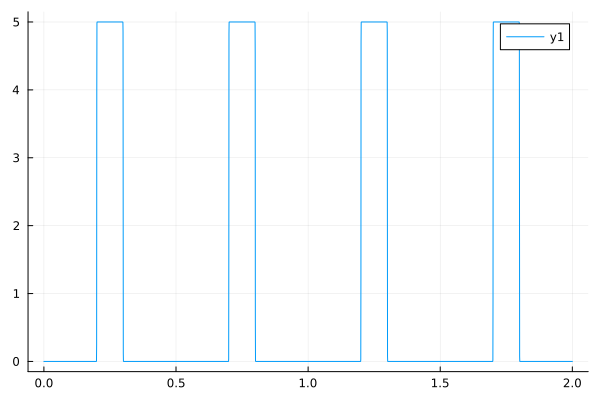

In [7]:
function smoothpulses(t, tstart, tend, period=1, amplitude=period / (tend - tstart), steepness=1000)
    @assert tstart < tend < period
    xi = 3 / 4 - (tend - tstart) / (2 * period)
    p = inv(1 + exp(steepness * (sinpi(2 * ((t - tstart) / period + xi)) - sinpi(2 * xi))))
    return amplitude * p
end

plot(t->smoothpulses(t, 0.2, 0.3, 0.5), 0.0, 2.0)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*